In [89]:
import numpy as np
import matplotlib.pyplot as plt

import os 
import pandas as pd
import pdb

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8,8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
%matplotlib inline
pylab.rcParams.update(params)
#Define Computer
Malphigui=0
if Malphigui:
    directory='/home/pdavid/Bureau/Hybrid_2D_beta/Code' #Malpighi
    directory_script='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/base_small'
else: #Auto_58
    directory='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Code/'
    directory_script='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/base_small'
    
    
os.chdir(directory)
csv_directory=directory_script+'/csv_outputs'
from Testing import extract_COMSOL_data

COMSOL_lin_dir=directory_script + '/COMSOL_output/linear'
COMSOL_metab_dir=directory_script + '/COMSOL_output/metab'

array_of_cells=np.squeeze(pd.read_csv(csv_directory + '/array_of_cells.csv').to_numpy())
print('range cells=',array_of_cells)

alpha=50
L=240

h=1/array_of_cells
print(h)

#Only for the odds (since the source is in hte center)
indexes=np.array([], dtype=int)
for i in range(len(array_of_cells)):
    if array_of_cells[i]%2:
        indexes=np.append(indexes, i)

range cells= [ 3  9 15 21 27 33 39]
[0.33333333 0.11111111 0.06666667 0.04761905 0.03703704 0.03030303
 0.02564103]


In [90]:
array_of_cells

array([ 3,  9, 15, 21, 27, 33, 39])

In [91]:
if Malphigui: print("YOU ARE IN MALPHIGUI")
print("Directory script: ", directory_script)
print("COMSOL_lin_dir: ", COMSOL_lin_dir)
print("csv_directory: ", csv_directory)

Directory script:  /home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/base_small
COMSOL_lin_dir:  /home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/base_small/COMSOL_output/linear
csv_directory:  /home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/base_small/csv_outputs


In [92]:
print(indexes)
print(array_of_cells[indexes])

[0 1 2 3 4 5 6]
[ 3  9 15 21 27 33 39]


In [93]:
COMSOL_metab_dir
print(h)

[0.33333333 0.11111111 0.06666667 0.04761905 0.03703704 0.03030303
 0.02564103]


In [94]:
q_FEM_linear, phi_FEM_linear, FEM_x_linear, FEM_y_linear, FEM_x_1D_linear, FEM_y_1D_linear, x_1D_linear, y_1D_linear = extract_COMSOL_data(COMSOL_lin_dir, [1,1,1])

q_FEM_metab, phi_FEM_metab, FEM_x_metab, FEM_y_metab, FEM_x_1D_metab, FEM_y_1D_metab, x_1D_metab, y_1D_metab = extract_COMSOL_data(COMSOL_metab_dir, [1,1,1])



In [95]:
q_Multi_linear=pd.read_fwf(csv_directory + '/q_Multi_linear.csv').to_numpy()
q_Multi_metab=pd.read_fwf(csv_directory + '/q_Multi_metab.csv').to_numpy()
q_FV_metab=pd.read_fwf(csv_directory + '/q_FV_metab.csv').to_numpy()
q_FV_linear=pd.read_fwf(csv_directory + '/q_FV_linear.csv').to_numpy()
q_Multi_linear=pd.read_fwf(csv_directory + '/q_Multi_linear.csv').to_numpy()
phi_Multi_FEM_linear=pd.read_fwf(csv_directory + '/phi_Multi_FEM_linear.csv').to_numpy()
phi_Multi_FEM_metab=pd.read_fwf(csv_directory + '/phi_Multi_FEM_metab.csv').to_numpy()


err_phi_Multi_linear=pd.read_fwf(csv_directory + '/err_phi_Multi_linear.csv').to_numpy()
err_phi_Multi_metab=pd.read_fwf(csv_directory + '/err_phi_Multi_metab.csv').to_numpy()
err_phi_FV_linear=pd.read_fwf(csv_directory + '/err_phi_FV_linear.csv').to_numpy()
err_q_Multi_linear=pd.read_fwf(csv_directory + '/err_q_Multi_linear.csv').to_numpy()
err_q_Multi_metab=pd.read_fwf(csv_directory + '/err_q_Multi_metab.csv').to_numpy()
err_q_FV_metab=pd.read_fwf(csv_directory + '/err_q_FV_metab.csv').to_numpy()



In [96]:
err_q_FV_linear=np.abs((q_FEM_linear-q_FV_linear)/q_FEM_linear)


/home/pdavid/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


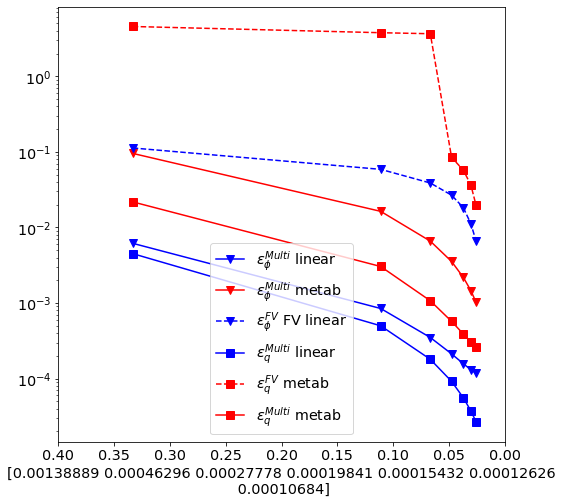

In [97]:
plt.plot(h[indexes], err_phi_Multi_linear[indexes], marker='v', color='b',markersize=8, label='$\\varepsilon_{\phi}^{Multi}$ linear')
plt.plot(h[indexes],err_phi_Multi_metab[indexes] ,marker='v', color='r',markersize=8, label='$\\varepsilon_{\phi}^{Multi}$ metab')
plt.plot(h[indexes], err_phi_FV_linear[indexes],'--v',color='b',markersize=8 , label='$\\varepsilon_{\phi}^{FV}$ FV linear')
plt.plot(h[indexes], err_q_Multi_linear[indexes], marker='s', color='b', markersize=8,label='$\\varepsilon_q^{Multi}$ linear')
plt.plot(h[indexes], err_q_FV_metab[indexes],'--s', color='r', markersize=8, label='$\\varepsilon_q^{FV}$ metab')
plt.plot(h[indexes], err_q_Multi_metab[indexes],marker='s',color='r', markersize=8, label='$\\varepsilon_q^{Multi}$ metab')
plt.xlim(0.4,0)
plt.yscale('log')
plt.xlabel(h/L)
plt.legend()


Text(0.5, 1.0, 'Flux estimation linear model')

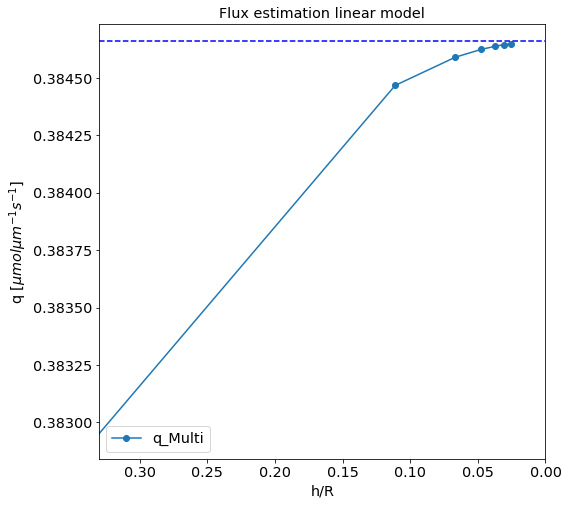

In [98]:
plt.plot(h[indexes],np.array(q_Multi_linear)[indexes],'-o' ,label='q_Multi')
plt.legend()
plt.xlabel('h/R')
plt.xlim(0.4,0)
plt.ylabel('q [$\mu mol \mu m^{-1} s^{-1}$]')
plt.axhline(y = q_FEM_linear, color = 'b', linestyle = '--', label='q_FEM')
plt.title('Flux estimation linear model')




/home/pdavid/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, 'Flux estimation non linear model')

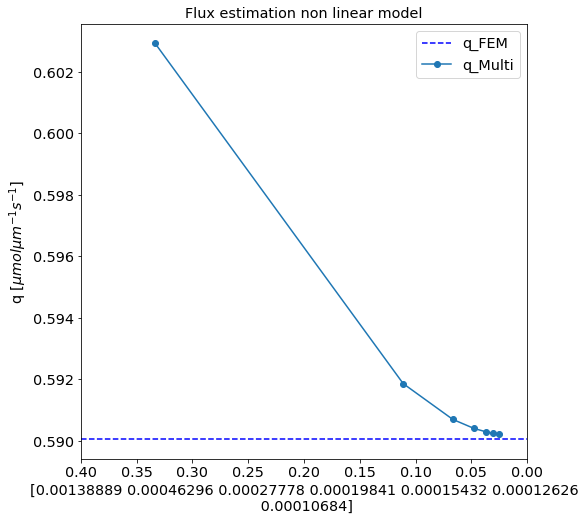

In [100]:
plt.axhline(y = q_FEM_metab, color = 'b', linestyle = '--', label='q_FEM')
plt.plot(h[indexes], np.array(q_Multi_metab)[indexes],'-o', label='q_Multi')
plt.legend()
plt.xlabel(h/L)
plt.xlim(0.4,0)
plt.ylabel('q [$\mu mol \mu m^{-1} s^{-1}$]')
plt.title('Flux estimation non linear model')